# X-13ARIMA-SEATS

In [12]:
#install.packages("seasonal")
install.packages("readxl")


The downloaded binary packages are in
	/var/folders/k0/5jhn7d7s1l75cf1srqv1wy980000gn/T//RtmpNKLRw7/downloaded_packages


In [13]:
library(seasonal)
library(readr)
library(readxl)

In [26]:
data <- read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Morosidad consumo.xlsx')

data$Fecha <- as.Date(data$Fecha, format = "%d/%m/%y")
#data$Consumo <- as.numeric(data$Consumo)
#data$Inversion <- as.numeric(data$Inversion)
head(data)

Fecha,Morosidad consumo trim
<date>,<dbl>
2001-03-31,10.28
2001-06-30,9.72
2001-09-30,9.65
2001-12-31,8.89
2002-03-31,7.78
2002-06-30,5.91


In [27]:
data_ts <- ts(data$`Morosidad consumo trim`, start = c(2000, 1), frequency = 4) 
# data_ts_consumo <- ts(data$Consumo, start = c(2000, 1), frequency = 4)
# data_ts_inversion <- ts(data$Inversion, start = c(2000, 1), frequency = 4)

class(data_ts)
# class(data_ts_consumo)
# class(data_ts_inversion)
# head(data_ts_consumo)
# head(data_ts_inversion)
head(data_ts)

[1] "ts"

[1] 10.28  9.72  9.65  8.89  7.78  5.91

Model used in SEATS is different: (0 1 1)(1 0 1)




Call:
seas(x = data_ts)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
AO2019.4           0.26313    0.04325   6.084 1.17e-09 ***
AR-Nonseasonal-01  0.42239    0.09693   4.357 1.32e-05 ***
AR-Seasonal-04     0.94728    0.03267  28.997  < 2e-16 ***
MA-Seasonal-04     0.81021    0.06410  12.641  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

SEATS adj.  ARIMA: (1 1 0)(1 0 1)  Obs.: 87  Transform: log
AICc: 24.21, BIC: 35.73  QS (no seasonality in final):1.084  
Box-Ljung (no autocorr.):  15.1   Shapiro (normality): 0.981  
Messages generated by X-13:
Notes:
- Model used for SEATS decomposition is different from the model
  estimated in the regARIMA modeling module of X-13ARIMA-SEATS.


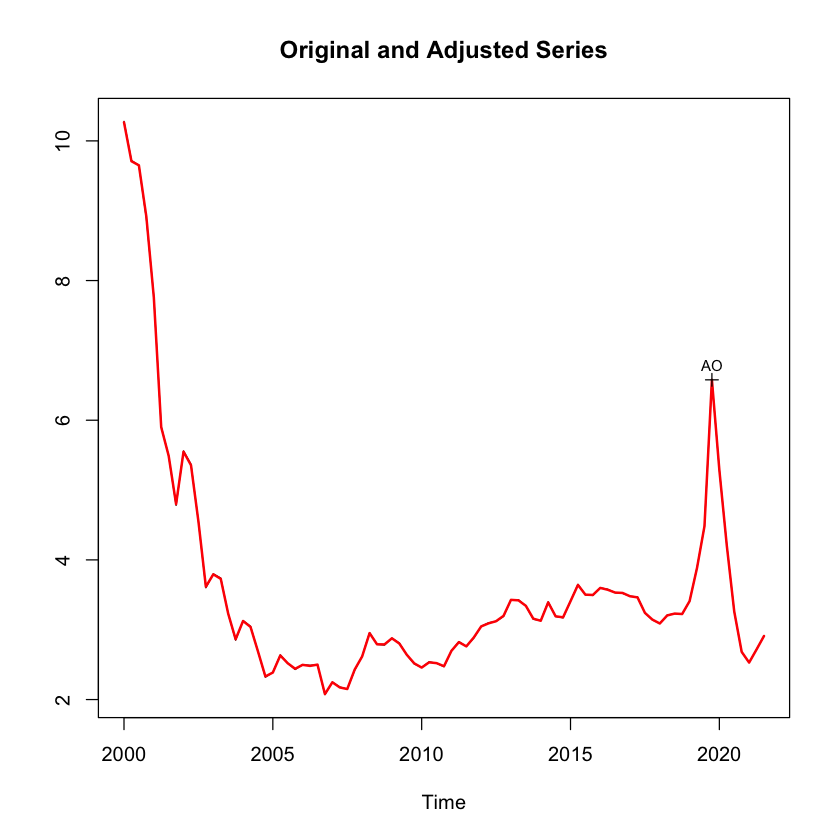

In [28]:
fit <- seas(data_ts)
summary(fit)
plot(fit)


Call:
seas(x = data_ts_inversion)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
AO2020.2       -0.76051    0.03216 -23.651  < 2e-16 ***
LS2020.4        0.21852    0.04548   4.805 1.55e-06 ***
MA-Seasonal-04  0.57468    0.08663   6.634 3.28e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

SEATS adj.  ARIMA: (0 1 0)(0 1 1)  Obs.: 92  Transform: log
AICc:  1469, BIC:  1479  QS (no seasonality in final):    0  
Box-Ljung (no autocorr.): 19.63   Shapiro (normality): 0.9848  

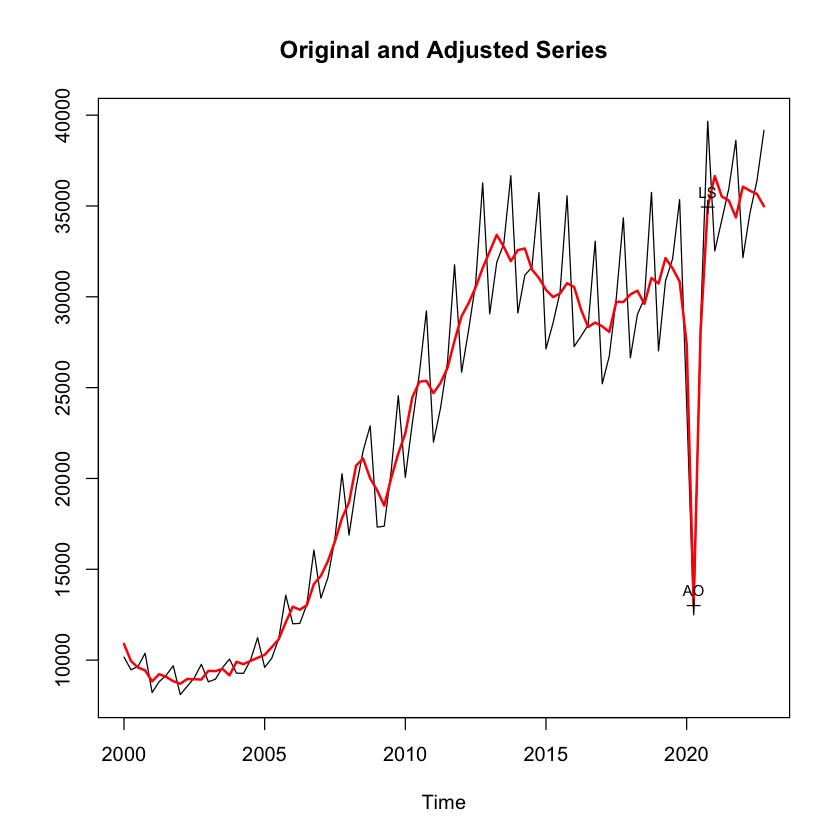

In [8]:
fit2 <- seas(data_ts_inversion)
summary(fit2)
plot(fit2)

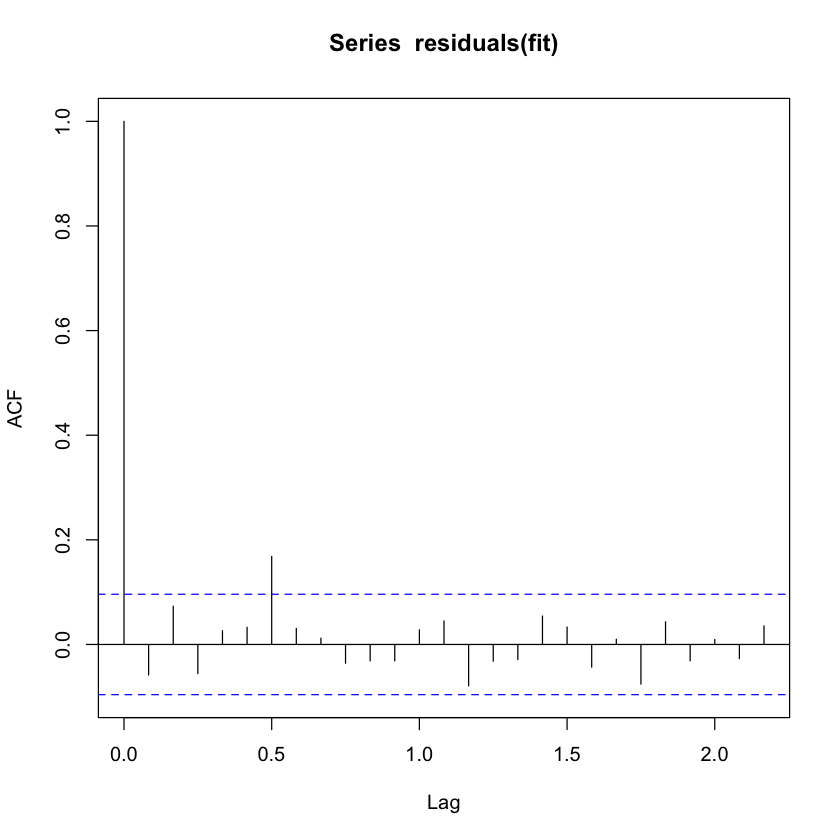

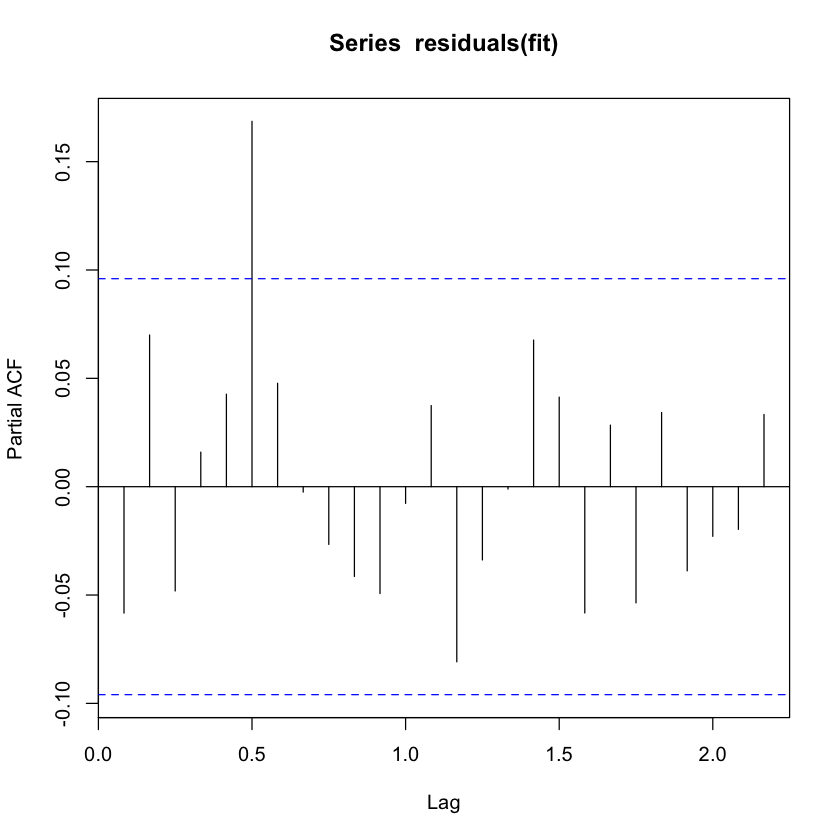

In [73]:
acf(residuals(fit))
pacf(residuals(fit))

In [15]:
# install.packages("dplyr")
install.packages("writexl")


  There is a binary version available but the source version is later:
        binary source needs_compilation
writexl  1.4.2  1.5.1              TRUE



installing the source package 'writexl'




In [16]:
library(dplyr)
library(writexl)

In [25]:
adjusted_series <- final(fit)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_morosidad micro.xlsx")

In [ ]:
adjusted_series <- final(fit1)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_consumo.xlsx")

In [18]:
adjusted_series <- final(fit2)

library(dplyr)

adjusted_df <- data.frame(
  Date = time(adjusted_series),      # Fechas
  Adjusted = as.numeric(adjusted_series) # Valores ajustados
)

write_xlsx(adjusted_df, "adjusted_series_inversion.xlsx")

In [30]:
install.packages("writexl")


  There is a binary version available but the source version is later:
        binary source needs_compilation
writexl  1.4.2  1.5.1              TRUE



installing the source package 'writexl'


